# Applied Data Science Capstone Project - The Battle of Neighborhoods



## Business Problem

   The city of Charlotte, North Carolina has seen tremendous economic and population growth over the past 20 years.  Between 2004 and 2014, Charlotte was ranked as the country's fastest-growing metro area, with 888,000 new residents. According to U.S. Census data, from 2005 to 2015, Charlotte topped the U.S. in millennial population growth. It is the second-largest city in the southeastern United States, just behind Jacksonville, Florida. Additionally, it is currently the third-fastest-growing major city in the United States, per the Seattle Times.  A group of investors is considering adding a quick-service empanada franchise to the Charlotte region and needs help determining which of Charlotte's 199 bustling neighborhoods is the best fit.  The ideal location would provide a consistent mix of traffic to the restaurant from the lunch hour business crowd, working parents on the go in the early evening, as well as late-night bar hoppers.  Due to previous lack luster results from investing in a different southeastern city, this investment group is keen on a successful launch.

## Data

This analysis will include location data gathered via the Foursquare API to determine the ideal neighborhood in which to launch the empanada restaurant.  The neighborhoods will be clustered and subsequently evaluated based on their proximity to corporate office buildings, family style attractions, gyms, other Latin American-style restaurants as well as non-Latin American-style restaurants. Because the data available in Foursquare does not include neighborhood specific details, it will be analyzed based on venue categories by postal code first, followed by finding the 10 most common venues per postal code, then compared alongside a popular neighborhood crowdsourcing site, hoodmaps.com.

## Methodology

Pandas was deployed to analyze the data pulled from the Foursquare API.  The python folium library was integral in creating several maps to display all of the venues in and around Charlotte as well as the different categories in comparison to Latin American-themed restaurants.  Clustering was used to make a cleaner map of all of the venues and the k-means algorithm was used to determine the number of clusters to use in order to find the ideal neighborhood where this restaurant could succeed.  

##### Importing the necessary libraries for data analysis and visualization

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation


!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize


! pip install folium==0.5.0
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Waiting for a Spark session to start...
Spark Initialization Done! ApplicationId = app-20210311142200-0000
KERNEL_ID = cf8682c3-235f-453e-b7b3-ef2466e8d99e
     |████████████████████████████████| 112 kB 12.4 MB/s eta 0:00:01
     |████████████████████████████████| 79 kB 4.5 MB/s  eta 0:00:01
     |████████████████████████████████| 125 kB 37.9 MB/s eta 0:00:01
     |████████████████████████████████| 61 kB 6.1 MB/s  eta 0:00:01
     |████████████████████████████████| 137 kB 56.9 MB/s eta 0:00:01
     |████████████████████████████████| 58 kB 4.9 MB/s  eta 0:00:01
     |████████████████████████████████| 147 kB 51.5 MB/s eta 0:00:01
     |████████████████████████████████| 178 kB 51.7 MB/s eta 0:00:01
  Created wheel for folium: filename=folium-0.5.0-py3-none-any.whl size=76240 sha256=2f8b13fab569e48d535414d2993208e1ed9da449f02f6808f9c4cb48b1a09217
  Stored in directory: /home/spark/shared/.cache/pip/wheels/b2/2f/2c/109e446b990d663ea5ce9b078b5e7c1a9c45cca91f377080f8
Successfully built folium

### Gathering the Data

###### Foursquare credentials

Using the Foursquare API, information about the venues that surround the greater Charlotte metropolitan area can be gathered.  This information will include a venue ID, name, address, latitude and longitude, neighborhood and category.   

In [2]:
CLIENT_ID = 'TTZNLNIM0I10RWP34ZTLOZZ5RAI1RO0MHJKALZNIPRHZC215' # your Foursquare ID
CLIENT_SECRET = 'S2OS1CRAGER4NXWO2XM1DULEZIS3STLXQYMMIIDYHNSLR3GO' # your Foursquare Secret
ACCESS_TOKEN = 'QHF3TACF15UEOA5KRPCLO2QNSVBKJ41WGANTJIYCJKBG0XW0' # your FourSquare Access Token
VERSION = '20210131'
LIMIT = 150
print('Your credentials:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentials:
CLIENT_ID: TTZNLNIM0I10RWP34ZTLOZZ5RAI1RO0MHJKALZNIPRHZC215
CLIENT_SECRET:S2OS1CRAGER4NXWO2XM1DULEZIS3STLXQYMMIIDYHNSLR3GO


##### Gathering the latitude and longitude for the city of Charlotte, NC

In [3]:
address = 'Charlotte, NC'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
radius = 30000
print(latitude, longitude)

35.2272086 -80.8430827


##### Generating the URL needed to pull the Foursquare data relevant to Charlotte

In [4]:
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?client_id=TTZNLNIM0I10RWP34ZTLOZZ5RAI1RO0MHJKALZNIPRHZC215&client_secret=S2OS1CRAGER4NXWO2XM1DULEZIS3STLXQYMMIIDYHNSLR3GO&ll=35.2272086,-80.8430827&v=20210131&radius=30000&limit=150'

##### Importing the Foursquare data

In [5]:
import requests

##### Confirming the results from the downloaded .json file

In [6]:
results = requests.get(url).json()
'There are {} around Center City Charlotte.'.format(len(results['response']['groups'][0]['items']))

'There are 100 around Center City Charlotte.'

##### Assigning the relevant parts of the JSON and creating the dataframe

In [7]:
items = results['response']['groups'][0]['items']
items[0]

# tranform venues into a dataframe
dataframe = json_normalize(items)
dataframe.head()

/opt/ibm/conda/miniconda/lib/python/site-packages/ipykernel/__main__.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.crossStreet,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,...,venue.photos.count,venue.photos.groups,venue.location.neighborhood,venue.delivery.id,venue.delivery.url,venue.delivery.provider.name,venue.delivery.provider.icon.prefix,venue.delivery.provider.icon.sizes,venue.delivery.provider.icon.name,venue.venuePage.id
0,e-0-4bad5829f964a52071483be3-0,0,"[{'summary': 'This spot is popular', 'type': '...",4bad5829f964a52071483be3,Blumenthal Performing Arts Center,130 N Tryon St,at 5th St,35.227930,-80.841951,"[{'label': 'display', 'lat': 35.22792953956913...",...,0,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,e-0-4e60dc33483bd9a9739e0b07-1,0,"[{'summary': 'This spot is popular', 'type': '...",4e60dc33483bd9a9739e0b07,Romare Bearden Park,300 S Church St,at W 3rd St,35.226927,-80.847685,"[{'label': 'display', 'lat': 35.22692655213674...",...,0,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,e-0-4b05863ef964a520f45922e3-2,0,"[{'summary': 'This spot is popular', 'type': '...",4b05863ef964a520f45922e3,The Capital Grille,201 N Tryon St,at E 5th St,35.228216,-80.841974,"[{'label': 'display', 'lat': 35.22821596511468...",...,0,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,e-0-4b1ab236f964a5209bef23e3-3,0,"[{'summary': 'This spot is popular', 'type': '...",4b1ab236f964a5209bef23e3,Knight Theater,430 S Tryon St,btw 1st & 2nd,35.224415,-80.847743,"[{'label': 'display', 'lat': 35.22441516682533...",...,0,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,e-0-4b058640f964a520495a22e3-4,0,"[{'summary': 'This spot is popular', 'type': '...",4b058640f964a520495a22e3,Belk Theater,130 N Tryon St,NaN,35.227711,-80.841663,"[{'label': 'display', 'lat': 35.2277106677568,...",...,0,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Wrangling the Data

##### Cleaning and filtering the dataframe

When pulling data using any API or website, it is necessary to narrow down the dataframe to include only relevant information.  It also requires checking and, where necessary, changing data formats in order to make the best use of the data analysis tools available, such as Pandas and Folium.

In [8]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['venue.name', 'venue.categories'] + [col for col in dataframe.columns if col.startswith('venue.location.')] + ['venue.id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

#filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

#clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]
# let's rename the columns so that they make sense
dataframe_filtered.rename (columns = {'lat':'Y', 'lng':'X'}, inplace = True)
dataframe_filtered

,name,categories,address,crossStreet,Y,X,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,neighborhood,id,categories
0,Blumenthal Performing Arts Center,"[{'id': '4bf58dd8d48988d1f2931735', 'name': 'P...",130 N Tryon St,at 5th St,35.227930,-80.841951,"[{'label': 'display', 'lat': 35.22792953956913...",130,28202,US,Charlotte,NC,United States,"[130 N Tryon St (at 5th St), Charlotte, NC 282...",NaN,4bad5829f964a52071483be3,Performing Arts Venue
1,Romare Bearden Park,"[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",300 S Church St,at W 3rd St,35.226927,-80.847685,"[{'label': 'display', 'lat': 35.22692655213674...",419,28202,US,Charlotte,NC,United States,"[300 S Church St (at W 3rd St), Charlotte, NC ...",NaN,4e60dc33483bd9a9739e0b07,Park
2,The Capital Grille,"[{'id': '4bf58dd8d48988d14e941735', 'name': 'A...",201 N Tryon St,at E 5th St,35.228216,-80.841974,"[{'label': 'display', 'lat': 35.22821596511468...",150,28202,US,Charlotte,NC,United States,"[201 N Tryon St (at E 5th St), Charlotte, NC 2...",NaN,4b05863ef964a520f45922e3,American Restaurant
3,Knight Theater,"[{'id': '4bf58dd8d48988d137941735', 'name': 'T...",430 S Tryon St,btw 1st & 2nd,35.224415,-80.847743,"[{'label': 'display', 'lat': 35.22441516682533...",525,28202,US,Charlotte,NC,United States,"[430 S Tryon St (btw 1st & 2nd), Charlotte, NC...",NaN,4b1ab236f964a5209bef23e3,Theater
4,Belk Theater,"[{'id': '5032792091d4c4b30a586d5c', 'name': 'C...",130 N Tryon St,NaN,35.227711,-80.841663,"[{'label': 'display', 'lat': 35.2277106677568,...",140,28202,US,Charlotte,NC,United States,"[130 N Tryon St, Charlotte, NC 28202, United S...",NaN,4b058640f964a520495a22e3,Concert Hall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Portofino's Eastway,"[{'id': '4bf58dd8d48988d110941735', 'name': 'I...",3124 Eastway Dr,NaN,35.212754,-80.783140,"[{'label': 'display', 'lat': 35.21275448802012...",5683,28205,US,Charlotte,NC,United States,"[3124 Eastway Dr, Charlotte, NC 28205, United ...",NaN,4b05863ff964a520365a22e3,Italian Restaurant
96,Landmark Diner,"[{'id': '4bf58dd8d48988d147941735', 'name': 'D...",4429 Central Ave,@ Kilborne Dr,35.213943,-80.769709,"[{'label': 'display', 'lat': 35.21394281437885...",6834,28205,US,Charlotte,NC,United States,"[4429 Central Ave (@ Kilborne Dr), Charlotte, ...",NaN,4b0ad2fef964a520772823e3,Diner
97,CHOPT,"[{'id': '4bf58dd8d48988d1bd941735', 'name': 'S...",4343 Park Rd,NaN,35.175125,-80.849761,"[{'label': 'display', 'lat': 35.17512544439751...",5829,28209,US,Charlotte,NC,United States,"[4343 Park Rd, Charlotte, NC 28209, United Sta...",NaN,55fb4f81498e201b26447bed,Salad Place
98,Eddie's Place,"[{'id': '4bf58dd8d48988d14e941735', 'name': 'A...",617 S Sharon Amity Rd,at Providence Rd.,35.171893,-80.806305,"[{'label': 'display', 'lat': 35.17189275292847...",7007,28211,US,Charlotte,NC,United States,"[617 S Sharon Amity Rd (at Providence Rd.), Ch...",NaN,4b0932c7f964a520ac1423e3,American Restaurant


In [9]:
#dataframe = json_normalize(items) # flatten JSON
dataframe = json_normalize(items)


# filter columns
filtered_columns = ['venue.name', 'venue.categories'] + [col for col in dataframe.columns if col.startswith('venue.location.')] + ['venue.id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# filter the category for each row
dataframe_filtered['venue.categories'] = dataframe_filtered.apply(get_category_type, axis=1)


# clean columns
dataframe_filtered.columns = [col.split('.')[-1] for col in dataframe_filtered.columns]

# let's rename the columns so that they make sense
dataframe_filtered.rename (columns = {'lat':'Y', 'lng':'X'}, inplace = True)


dataframe_filtered.head(100)

/opt/ibm/conda/miniconda/lib/python/site-packages/ipykernel/__main__.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  from ipykernel import kernelapp as app


,name,categories,address,crossStreet,Y,X,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,neighborhood,id
0,Blumenthal Performing Arts Center,Performing Arts Venue,130 N Tryon St,at 5th St,35.227930,-80.841951,"[{'label': 'display', 'lat': 35.22792953956913...",130,28202,US,Charlotte,NC,United States,"[130 N Tryon St (at 5th St), Charlotte, NC 282...",NaN,4bad5829f964a52071483be3
1,Romare Bearden Park,Park,300 S Church St,at W 3rd St,35.226927,-80.847685,"[{'label': 'display', 'lat': 35.22692655213674...",419,28202,US,Charlotte,NC,United States,"[300 S Church St (at W 3rd St), Charlotte, NC ...",NaN,4e60dc33483bd9a9739e0b07
2,The Capital Grille,American Restaurant,201 N Tryon St,at E 5th St,35.228216,-80.841974,"[{'label': 'display', 'lat': 35.22821596511468...",150,28202,US,Charlotte,NC,United States,"[201 N Tryon St (at E 5th St), Charlotte, NC 2...",NaN,4b05863ef964a520f45922e3
3,Knight Theater,Theater,430 S Tryon St,btw 1st & 2nd,35.224415,-80.847743,"[{'label': 'display', 'lat': 35.22441516682533...",525,28202,US,Charlotte,NC,United States,"[430 S Tryon St (btw 1st & 2nd), Charlotte, NC...",NaN,4b1ab236f964a5209bef23e3
4,Belk Theater,Concert Hall,130 N Tryon St,NaN,35.227711,-80.841663,"[{'label': 'display', 'lat': 35.2277106677568,...",140,28202,US,Charlotte,NC,United States,"[130 N Tryon St, Charlotte, NC 28202, United S...",NaN,4b058640f964a520495a22e3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Portofino's Eastway,Italian Restaurant,3124 Eastway Dr,NaN,35.212754,-80.783140,"[{'label': 'display', 'lat': 35.21275448802012...",5683,28205,US,Charlotte,NC,United States,"[3124 Eastway Dr, Charlotte, NC 28205, United ...",NaN,4b05863ff964a520365a22e3
96,Landmark Diner,Diner,4429 Central Ave,@ Kilborne Dr,35.213943,-80.769709,"[{'label': 'display', 'lat': 35.21394281437885...",6834,28205,US,Charlotte,NC,United States,"[4429 Central Ave (@ Kilborne Dr), Charlotte, ...",NaN,4b0ad2fef964a520772823e3
97,CHOPT,Salad Place,4343 Park Rd,NaN,35.175125,-80.849761,"[{'label': 'display', 'lat': 35.17512544439751...",5829,28209,US,Charlotte,NC,United States,"[4343 Park Rd, Charlotte, NC 28209, United Sta...",NaN,55fb4f81498e201b26447bed
98,Eddie's Place,American Restaurant,617 S Sharon Amity Rd,at Providence Rd.,35.171893,-80.806305,"[{'label': 'display', 'lat': 35.17189275292847...",7007,28211,US,Charlotte,NC,United States,"[617 S Sharon Amity Rd (at Providence Rd.), Ch...",NaN,4b0932c7f964a520ac1423e3


##### Exploring the category information

In [10]:
# find unique categories
print('There are {} unique categories.'.format(len(dataframe_filtered['categories'].unique())))

There are 57 unique categories.


##### Exploring the data types

In [11]:
dataframe_filtered.dtypes

name                 object
categories           object
address              object
crossStreet          object
Y                   float64
X                   float64
labeledLatLngs       object
distance              int64
postalCode           object
cc                   object
city                 object
state                object
country              object
formattedAddress     object
neighborhood         object
id                   object
dtype: object

##### Converting the data type for postal codes from object to string

In [12]:
dataframe_filtered[["postalCode"]] = dataframe_filtered[["postalCode"]].astype("string")
dataframe_filtered.dtypes

name                 object
categories           object
address              object
crossStreet          object
Y                   float64
X                   float64
labeledLatLngs       object
distance              int64
postalCode           string
cc                   object
city                 object
state                object
country              object
formattedAddress     object
neighborhood         object
id                   object
dtype: object

##### Exploring the dataframe

It is important to take a look at the data in order to identify any potential gaps in information and to ensure that enough information is available to properly conduct the necessary analysis.

In [13]:
dataframe_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              100 non-null    object 
 1   categories        100 non-null    object 
 2   address           100 non-null    object 
 3   crossStreet       43 non-null     object 
 4   Y                 100 non-null    float64
 5   X                 100 non-null    float64
 6   labeledLatLngs    100 non-null    object 
 7   distance          100 non-null    int64  
 8   postalCode        98 non-null     string 
 9   cc                100 non-null    object 
 10  city              100 non-null    object 
 11  state             100 non-null    object 
 12  country           100 non-null    object 
 13  formattedAddress  100 non-null    object 
 14  neighborhood      7 non-null      object 
 15  id                100 non-null    object 
dtypes: float64(2), int64(1), object(12), string(1

 *Note that the neighborhood classification was available for only 8 venues, therefore postal codes will be used instead of neighborhood names for clustering purposes.  The cross street column is not relevant for this analysis because latitude (Y) and longitude (X) will be used for mapping purposes.  The remaining information appears to be complete. 

##### Summarizing the different category types in order to combine the similar ones

In [14]:
dataframe_filtered['categories'].value_counts()

Brewery                            13
Park                                5
American Restaurant                 5
Pizza Place                         4
Bakery                              3
Deli / Bodega                       3
Grocery Store                       3
Italian Restaurant                  3
Bar                                 2
Café                                2
Burger Joint                        2
Mexican Restaurant                  2
Coffee Shop                         2
Theater                             2
BBQ Joint                           2
Southern / Soul Food Restaurant     2
Gift Shop                           2
Peruvian Restaurant                 2
Gym                                 2
Farmers Market                      2
Indian Restaurant                   1
Concert Hall                        1
Thai Restaurant                     1
Art Gallery                         1
Bookstore                           1
Comic Shop                          1
Gastropub   

With 58 individual categories, it is beneficial to combine similar ones for the purposes of this analysis.

##### Combining the similar categories to enrich the analysis and provide more meaningful classification

In [15]:
dataframe_filtered['categories'].replace(to_replace=['Beer Garden', 'Gastropub', 'Sports Bar', 'Wine Bar', 'Brewery', 'Bar'], value=['Brewery / Bar','Brewery / Bar', 'Brewery / Bar', 'Brewery / Bar', 'Brewery / Bar','Brewery / Bar'],inplace=True)

dataframe_filtered['categories'].replace(to_replace=['Peruvian Restaurant', 'Mexican Restaurant', 'Burrito Place', 'Taco Place'], 
                                         value=['Latin American Restaurant', 'Latin American Restaurant', 'Latin American Restaurant','Latin American Restaurant'],
                                         inplace=True)

dataframe_filtered['categories'].replace(to_replace=['Grocery Store', 'Farmers Market', 'Market', 'Convenience Store', 'Deli / Bodega', 'Beer Store', 'Wine Shop'],
                                         value=['Food Market', 'Food Market', 'Food Market','Food Market', 'Food Market', 'Food Market', 'Food Market'],
                                         inplace=True)

dataframe_filtered['categories'].replace(to_replace=['Science Museum', 'General Entertainment', 'Park', 'Theater', 'Baseball Stadium', 'Art Museum', 'Art Gallery', 'Basketball Stadium', 'Rock Club', 'Performing Arts Venue', 'Concert Hall', 'Football Stadium'],
                                         value=['Arts and Entertainment', 'Arts and Entertainment', 'Arts and Entertainment', 'Arts and Entertainment', 'Arts and Entertainment','Arts and Entertainment', 'Arts and Entertainment', 'Arts and Entertainment', 'Arts and Entertainment', 'Arts and Entertainment', 'Arts and Entertainment', 'Arts and Entertainment'],
                                         inplace=True)

dataframe_filtered['categories'].replace(to_replace=['Pizza Place', 'BBQ Joint', 'Salad Place', 'Hot Dog Joint', 'Burger Joint', 'Diner', 'Steakhouse', 'Snack Place', 'Restaurant', 'Southern / Soul Food Restaurant', 'Cajun / Creole Restaurant'],
                                         value=['American Restaurant', 'American Restaurant', 'American Restaurant','American Restaurant', 'American Restaurant', 'American Restaurant', 'American Restaurant', 'American Restaurant', 'American Restaurant','American Restaurant', 'American Restaurant'],
                                         inplace=True)

dataframe_filtered['categories'].replace(to_replace=['Bakery', 'Café', 'Coffee Shop'],
                                         value=['Café', 'Café', 'Café'],
                                         inplace=True)

dataframe_filtered['categories'].replace(to_replace=['Italian Restaurant', 'Greek Restaurant', 'Eastern European Restaurant'],
                                         value=['European Restaurant', 'European Restaurant', 'European Restaurant'],
                                         inplace=True)

dataframe_filtered['categories'].replace(to_replace=['Vietnamese Restaurant', 'Thai Restaurant', 'Sushi Restaurant', 'Indian Restaurant', 'Vegetarian / Vegan Restaurant'],
                                         value=['Asian Restaurant', 'Asian Restaurant', 'Asian Restaurant', 'Asian Restaurant', 'Asian Restaurant'],
                                         inplace=True)

dataframe_filtered['categories'].replace(to_replace=['Yoga Studio'],
                                         value=['Gym'],
                                         inplace=True)

dataframe_filtered['categories'].replace(to_replace=['Bed & Breakfast'],
                                         value=['Hotel'],
                                         inplace=True)

dataframe_filtered['categories'].replace(to_replace=['Gift Shop', 'Smoke Shop', 'Comic Shop', 'Antique Shop', 'Bookstore', 'Liquor Store'],
                                         value=['Specialty Shop', 'Specialty Shop', 'Specialty Shop', 'Specialty Shop', 'Specialty Shop', 'Specialty Shop'],
                                         inplace=True)

dataframe_filtered['categories'].value_counts()

American Restaurant          21
Brewery / Bar                18
Arts and Entertainment       16
Food Market                  12
Café                          7
Latin American Restaurant     7
Specialty Shop                5
Asian Restaurant              5
European Restaurant           5
Gym                           3
Hotel                         1
Name: categories, dtype: int64

Restaurants were consolidated into four main types:  American, Latin American, European and Asian.  These could have been combined in another fashion, such as by price range or quick service versus sit-down style, however complete restaurant details were outside of the available information provided via the Foursquare API.

Other combinations of note include the consolidation of 'Science Museum', 'General Entertainment', 'Park', 'Theater', 'Baseball Stadium', 'Art Museum', 'Art Gallery', 'Basketball Stadium', 'Rock Club', 'Performing Arts Venue', 'Concert Hall', 'Football Stadium' into the Arts and Entertainment category; 'Grocery Store', 'Farmers Market', 'Market', 'Convenience Store', 'Deli / Bodega', 'Beer Store', 'Wine Shop' into the Food Market category; and 'Gift Shop', 'Smoke Shop', 'Comic Shop', 'Antique Shop', 'Bookstore', 'Liquor Store' into the Specialty Shop category.

Anecdotally, there are some clear gaps with what was provided in the Foursquare .json file.  There is more than one hotel and more than three gyms in Charlotte.  However, at first glance the restaurant as well as the arts and entertainment categories appear to be more accurate than the hotel and gym information.  

##### Confirming that the categories have successfully been narrowed

In [16]:
# find unique categories
print('There are {} unique categories.'.format(len(dataframe_filtered['categories'].unique())))

There are 11 unique categories.


##### Filtering the dataframe to include only Latin American Restaurants

In [17]:
LAR = dataframe_filtered['categories'] =='Latin American Restaurant'
print(LAR)

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Name: categories, Length: 100, dtype: bool


In [18]:
dataframe_filtered[LAR]

,name,categories,address,crossStreet,Y,X,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,neighborhood,id
22,Sabor Latin Street Grill,Latin American Restaurant,415 Hawthorne Ln,Hawthorne and 7th St,35.216258,-80.821734,"[{'label': 'display', 'lat': 35.21625800318562...",2292,28204,US,Charlotte,NC,United States,"[415 Hawthorne Ln (Hawthorne and 7th St), Char...",Elizabeth,51d45db05019be5f32cffca5
24,Viva Chicken Elizabeth Avenue,Latin American Restaurant,1617 Elizabeth Ave,NaN,35.213407,-80.825966,"[{'label': 'display', 'lat': 35.21340676476259...",2187,28204,US,Charlotte,NC,United States,"[1617 Elizabeth Ave, Charlotte, NC 28204, Unit...",NaN,5101b86c3950fe1fc6f0e85f
28,Superica,Latin American Restaurant,101 W Worthington Ave,Suite 100,35.211736,-80.860303,"[{'label': 'display', 'lat': 35.21173606251148...",2327,28203,US,Charlotte,NC,United States,"[101 W Worthington Ave (Suite 100), Charlotte,...",NaN,5b08a2d6471d6e002cec010e
39,Bakersfield,Latin American Restaurant,1301 East Blvd,NaN,35.202040,-80.844430,"[{'label': 'display', 'lat': 35.20204, 'lng': ...",2804,28203,US,Charlotte,NC,United States,"[1301 East Blvd, Charlotte, NC 28203, United S...",NaN,53f00e62498e381a6ca0e5cc
73,Cabo Fish Taco,Latin American Restaurant,3201 N Davidson St,at E 35th St,35.247173,-80.805700,"[{'label': 'display', 'lat': 35.247173, 'lng':...",4060,28205,US,Charlotte,NC,United States,"[3201 N Davidson St (at E 35th St), Charlotte,...",NaN,4b05863ef964a520025a22e3
81,Sabor Latin Street Grill,Latin American Restaurant,3205 N Davidson St,NaN,35.247129,-80.805511,"[{'label': 'display', 'lat': 35.24712907733035...",4072,28205,US,Charlotte,NC,United States,"[3205 N Davidson St, Charlotte, NC 28205, Unit...",NaN,56f30765498ebf9bc7c63a4c
91,Viva Chicken Park Road,Latin American Restaurant,"4500 Park Rd, Suite 100",Montford,35.169891,-80.851038,"[{'label': 'display', 'lat': 35.16989057672731...",6421,28209,US,Charlotte,NC,United States,"[4500 Park Rd, Suite 100 (Montford), Charlotte...",NaN,57f52609498e1f07ad4ed4b2


##### Filtering the dataframe in preparation for plotting on the map

In [19]:
Arts = dataframe_filtered['categories'] == 'Arts and Entertainment' 
Shops = dataframe_filtered['categories'] == 'Specialty Shop' 
Cafe = dataframe_filtered['categories'] == 'Café' 
Nightlife = dataframe_filtered['categories'] == 'Brewery / Bar' 
Gym = dataframe_filtered['categories'] == 'Gym' 
Mkt = dataframe_filtered['categories'] == 'Food Market' 
AmerR = dataframe_filtered['categories'] == 'American Restaurant' 
EuroR = dataframe_filtered['categories'] == 'European Restaurant' 
AsianR = dataframe_filtered['categories'] == 'Asian Restaurant'

### Mapping the Data

Now that it has been cleaned, classified and filtered, it is time to visualize the data set.  First up, mapping all of the venues listed for Charlotte in Foursquare.

##### Building the map to display all of the Foursquare venues (in blue) around the center of Charlotte (red dot)

In [20]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around Center City Charlotte

# add a red circle marker to represent the center of Charlotte
folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Charlotte, NC',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the venues as blue circle markers
for lat, lng, label in zip(dataframe_filtered.Y, dataframe_filtered.X, dataframe_filtered.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

loc = 'Charlotte Venues Map'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc) 
venues_map.get_root().html.add_child(folium.Element(title_html))

# display map
venues_map

With so many venues in a concentrated area, it is beneficial to cluster the data points to get a better picture of the areas of saturation.

##### Using Clustering to show a cleaner venue map of Charlotte

In [21]:
from folium import plugins

# let's start again with a clean copy of the map of Charlotte
clt_map = folium.Map(location = [latitude, longitude], zoom_start = 13)

# instantiate a mark cluster object for the venues in the dataframe
dataframe_filtered2 = plugins.MarkerCluster().add_to(clt_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(dataframe_filtered.Y, dataframe_filtered.X, dataframe_filtered.categories):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(dataframe_filtered2)

loc = 'Venue Clustering Map of Charlotte'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc) 
clt_map.get_root().html.add_child(folium.Element(title_html))    

# display map
clt_map

The most heavily concentrated areas (in yellow) are in Uptown, Elizabeth, South End and NODA.  This map displays all 11 of the unique venue categories, so further drilling into specific categories is necessary.

##### Comparison map of the Latin American restaurants around Charlotte (in purple) and the other restaurants (in yellow)

In [22]:
LAR_restaurant_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around Center City Charlotte

loc = 'Charlotte Restaurant Map'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc) 
LAR_restaurant_map.get_root().html.add_child(folium.Element(title_html))

# add a red circle marker to represent the center of Charlotte
folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Charlotte, NC',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(LAR_restaurant_map)

# add the venues as purple circle markers
for lat, lng, label in zip(dataframe_filtered[LAR].Y, dataframe_filtered[LAR].X, dataframe_filtered[LAR].categories):
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        color='purple',
        popup=label,
        fill = True,
        fill_color='purple',
        fill_opacity=0.6
    ).add_to(LAR_restaurant_map)
    
# add the venues as yellow circle markers
for lat, lng, label in zip(dataframe_filtered[AmerR].Y, dataframe_filtered[AmerR].X, dataframe_filtered[AmerR].categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='black',
        popup=label,
        fill = True,
        fill_color='yellow',
        fill_opacity=0.6
    ).add_to(LAR_restaurant_map)    

for lat, lng, label in zip(dataframe_filtered[EuroR].Y, dataframe_filtered[EuroR].X, dataframe_filtered[EuroR].categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='black',
        popup=label,
        fill = True,
        fill_color='yellow',
        fill_opacity=0.6
    ).add_to(LAR_restaurant_map)
    
for lat, lng, label in zip(dataframe_filtered[AsianR].Y, dataframe_filtered[AsianR].X, dataframe_filtered[AsianR].categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='black',
        popup=label,
        fill = True,
        fill_color='yellow',
        fill_opacity=0.6
    ).add_to(LAR_restaurant_map) 
for lat, lng, label in zip(dataframe_filtered[Cafe].Y, dataframe_filtered[Cafe].X, dataframe_filtered[Cafe].categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='black',
        popup=label,
        fill = True,
        fill_color='yellow',
        fill_opacity=0.6
    ).add_to(LAR_restaurant_map)
    
# display map
LAR_restaurant_map

The eight Latin American restaurants are all located outside of center city Charlotte.  This map exposes yet another gap in the reliability of the Foursquare data.  There are definitely more than four restaurants in center city Charlotte, for example.  Because the project instructions explicitly state to use the Foursquare API, this information will be treated as the best source of information for the purposes of this analysis and therefore considered the most accurate available.

##### Comparison map of the Latin American restaurants around Charlotte (in purple) and Cultural Attractions, Shopping and Gyms (in green)

In [23]:
LAR_family_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around Center City Charlotte

loc = 'Charlotte Family Attraction Map'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc) 
LAR_family_map.get_root().html.add_child(folium.Element(title_html))

# add a red circle marker to represent the center of Charlotte
folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Charlotte, NC',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(LAR_family_map)

# add the venues as purple circle markers
for lat, lng, label in zip(dataframe_filtered[LAR].Y, dataframe_filtered[LAR].X, dataframe_filtered[LAR].categories):
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        color='purple',
        popup=label,
        fill = True,
        fill_color='purple',
        fill_opacity=0.6
    ).add_to(LAR_family_map)
    
# add the venues as green circle markers
for lat, lng, label in zip(dataframe_filtered[Arts].Y, dataframe_filtered[Arts].X, dataframe_filtered[Arts].categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='black',
        popup=label,
        fill = True,
        fill_color='green',
        fill_opacity=0.6
    ).add_to(LAR_family_map)    

for lat, lng, label in zip(dataframe_filtered[Gym].Y, dataframe_filtered[Gym].X, dataframe_filtered[Gym].categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='black',
        popup=label,
        fill = True,
        fill_color='green',
        fill_opacity=0.6
    ).add_to(LAR_family_map)
    
for lat, lng, label in zip(dataframe_filtered[Mkt].Y, dataframe_filtered[Mkt].X, dataframe_filtered[Mkt].categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='black',
        popup=label,
        fill = True,
        fill_color='green',
        fill_opacity=0.6
    ).add_to(LAR_family_map) 
for lat, lng, label in zip(dataframe_filtered[Shops].Y, dataframe_filtered[Shops].X, dataframe_filtered[Shops].categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='black',
        popup=label,
        fill = True,
        fill_color='green',
        fill_opacity=0.6
    ).add_to(LAR_family_map) 
    
# display map
LAR_family_map

Center city Charlotte contains the heaviest concentration of the cultural, arts, entertainment, gym and shopping venues.

##### Comparison map of the Latin American restaurants around Charlotte (in purple) and nightlife entertainment in (orange)

In [24]:
LAR_nightlife_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around Center City Charlotte

loc = 'Charlotte Nightlife Map'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc) 
LAR_nightlife_map.get_root().html.add_child(folium.Element(title_html))

# add a red circle marker to represent the center of Charlotte
folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Charlotte, NC',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(LAR_nightlife_map)

# add the venues as purple circle markers
for lat, lng, label in zip(dataframe_filtered[LAR].Y, dataframe_filtered[LAR].X, dataframe_filtered[LAR].categories):
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        color='purple',
        popup=label,
        fill = True,
        fill_color='purple',
        fill_opacity=0.6
    ).add_to(LAR_nightlife_map)
    
# add the venues as orange circle markers
for lat, lng, label in zip(dataframe_filtered[Nightlife].Y, dataframe_filtered[Nightlife].X, dataframe_filtered[Nightlife].categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='black',
        popup=label,
        fill = True,
        fill_color='orange',
        fill_opacity=0.6
    ).add_to(LAR_nightlife_map)    


    
# display map
LAR_nightlife_map

Anecdotally, there are more nightlife options in center city Charlotte than what is provided by Foursquare, however this lack of information is not relevant for the purposes of this analysis and this map will not be included in the final report.  

### Clustering the Data

The K-Nearest Neighbors algorithm will be using the labeled points to assign each venue to similar clusters based on their features.  First up is to check how many venues were returned for each postal code.

##### Grouping the postal codes

In [25]:
dataframe_filtered.groupby('postalCode').count()

,name,categories,address,crossStreet,Y,X,labeledLatLngs,distance,cc,city,state,country,formattedAddress,neighborhood,id
postalCode,,,,,,,,,,,,,,,
28202,19,19,19,11,19,19,19,19,19,19,19,19,19,2,19
28203,21,21,21,5,21,21,21,21,21,21,21,21,21,2,21
28204,11,11,11,5,11,11,11,11,11,11,11,11,11,1,11
28205,24,24,24,11,24,24,24,24,24,24,24,24,24,1,24
28206,4,4,4,2,4,4,4,4,4,4,4,4,4,0,4
28207,2,2,2,0,2,2,2,2,2,2,2,2,2,0,2
28208,4,4,4,1,4,4,4,4,4,4,4,4,4,1,4
28209,8,8,8,5,8,8,8,8,8,8,8,8,8,0,8
28211,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1


In [26]:
dataframe_filtered[["postalCode"]] = dataframe_filtered[["postalCode"]].astype("string")

In [27]:
dataframe_filtered=dataframe_filtered.dropna(subset=["postalCode"], axis=0)
dataframe_filtered['postalCode'] = dataframe_filtered['postalCode'].str[:5]
dataframe_filtered['postalCode'].str[:5]
dataframe_filtered['postalCode'].astype(str).astype(int)

0     28202
1     28202
2     28202
3     28202
4     28202
      ...  
95    28205
96    28205
97    28209
98    28211
99    28209
Name: postalCode, Length: 98, dtype: int64

Next, checking the concentration of each venue category per postal code by taking the average of the frequency of occurrence of each type of venue.

##### Using one hot encoding to analyze the postal codes based on the venue category (as previously mentioned, neighborhood information was not available)

In [28]:
# analyze each neighborhood

# one hot encoding
clt_onehot = pd.get_dummies(dataframe_filtered[['categories']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
clt_onehot['postalCode'] = dataframe_filtered['postalCode'] 

# group rows by neighborhood and take mean of the frequency of occurence of each category
clt_grouped = clt_onehot.groupby('postalCode').mean()
clt_grouped

,American Restaurant,Arts and Entertainment,Asian Restaurant,Brewery / Bar,Café,European Restaurant,Food Market,Gym,Hotel,Latin American Restaurant,Specialty Shop
postalCode,,,,,,,,,,,
28202,0.052632,0.526316,0.000000,0.000000,0.052632,0.105263,0.105263,0.105263,0.0,0.000000,0.052632
28203,0.190476,0.095238,0.142857,0.142857,0.095238,0.000000,0.142857,0.047619,0.0,0.095238,0.047619
28204,0.090909,0.090909,0.000000,0.090909,0.181818,0.090909,0.181818,0.000000,0.0,0.181818,0.090909
28205,0.375000,0.000000,0.041667,0.291667,0.083333,0.083333,0.041667,0.000000,0.0,0.083333,0.000000
28206,0.000000,0.500000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
28207,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.5,0.000000,0.000000
28208,0.250000,0.000000,0.000000,0.250000,0.000000,0.000000,0.500000,0.000000,0.0,0.000000,0.000000
28209,0.375000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.0,0.125000,0.250000
28211,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000


##### Finding the most common venues per postal code and displaying the top 10 venues for each

In [29]:
# function to find most common venues
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [30]:
# display top 10 venues for each postal code
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['postalCode']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
postalCodes_venues_sorted = pd.DataFrame(columns=columns)
postalCodes_venues_sorted['postalCode'] = clt_grouped.index

for ind in np.arange(clt_grouped.shape[0]):
    postalCodes_venues_sorted.iloc[ind, 1:] = return_most_common_venues(clt_grouped.iloc[ind, :], num_top_venues)

postalCodes_venues_sorted

,postalCode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,28202,Arts and Entertainment,Gym,Food Market,European Restaurant,Specialty Shop,Café,Latin American Restaurant,Hotel,Brewery / Bar,Asian Restaurant
1,28203,Food Market,Brewery / Bar,Asian Restaurant,Latin American Restaurant,Café,Arts and Entertainment,Specialty Shop,Gym,Hotel,European Restaurant
2,28204,Latin American Restaurant,Food Market,Café,Specialty Shop,European Restaurant,Brewery / Bar,Arts and Entertainment,Hotel,Gym,Asian Restaurant
3,28205,Brewery / Bar,Latin American Restaurant,European Restaurant,Café,Food Market,Asian Restaurant,Specialty Shop,Hotel,Gym,Arts and Entertainment
4,28206,Brewery / Bar,Arts and Entertainment,Specialty Shop,Latin American Restaurant,Hotel,Gym,Food Market,European Restaurant,Café,Asian Restaurant
5,28207,Hotel,Brewery / Bar,Specialty Shop,Latin American Restaurant,Gym,Food Market,European Restaurant,Café,Asian Restaurant,Arts and Entertainment
6,28208,Food Market,Brewery / Bar,Specialty Shop,Latin American Restaurant,Hotel,Gym,European Restaurant,Café,Asian Restaurant,Arts and Entertainment
7,28209,Specialty Shop,Food Market,Latin American Restaurant,Hotel,Gym,European Restaurant,Café,Brewery / Bar,Asian Restaurant,Arts and Entertainment
8,28211,Specialty Shop,Latin American Restaurant,Hotel,Gym,Food Market,European Restaurant,Café,Brewery / Bar,Asian Restaurant,Arts and Entertainment
9,28215,Asian Restaurant,Specialty Shop,Latin American Restaurant,Hotel,Gym,Food Market,European Restaurant,Café,Brewery / Bar,Arts and Entertainment


Postal codes 28204 and 28211 list their most common venue as being a Latin American Restaurant, with it being the second most common for 28205, behind Brewery / Bar.  Latin American Restaurants rank as the 7th most common venue for Postal Code 28202, with Arts and Entertainment being the most common venue, making it a very attractive opportunity with less saturation and high potential for family traffic. 

##### Using k-means for clustering and finding the optimal k

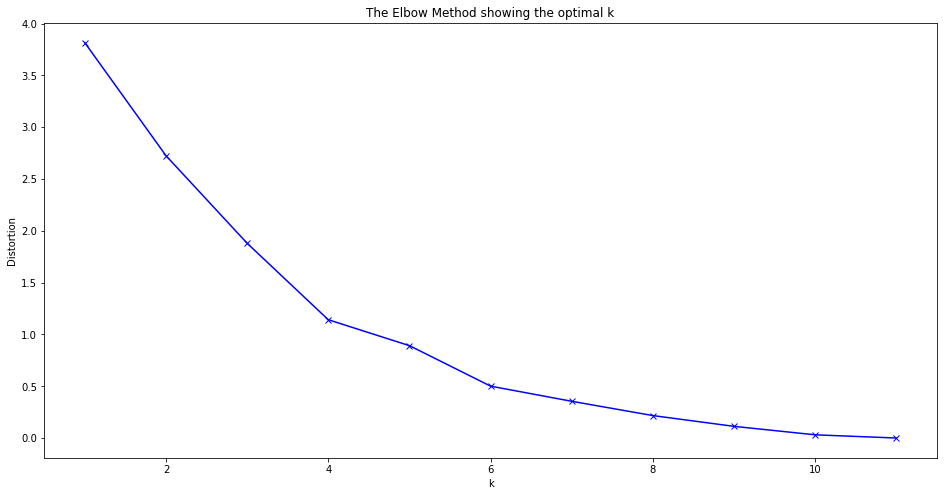

In [31]:
## clustering
from sklearn.cluster import KMeans
# find optimal k with elbow plot method
distortions = []
K = range(1,12)

for k_clusters in K:
    kmeans = KMeans(n_clusters=k_clusters, random_state=0).fit(clt_grouped)
    distortions.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Finding the optimal value for k is important because if it is too low, it will be too complex and if it is too high, it will be an overly generalized model, neither of which would be ideal for predictive purposes.

**Setting the number of clusters: based on the elbow method, the graph appears to indicate that 3 could be the optimal k, however several iterations of this clustering analysis produced an outcome that made more sense when using 6 clusters.

In [32]:
# set number of clusters
kclusters = 6
# 6 clusters in optimal
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(clt_grouped)
kmeans.labels_

array([2, 0, 0, 0, 2, 5, 0, 0, 4, 1, 3], dtype=int32)

##### Adding clustering labels

In [33]:
# add clustering labels
#dataframe_filtered = ['categories', 'lat', 'lng','postalCode']
postalCodes_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
clt_merged = dataframe_filtered

# merge clt_grouped with clt_df to add latitude/longitude for each postal code
clt_merged = clt_merged.join(postalCodes_venues_sorted.set_index('postalCode'), on='postalCode')
clt_merged=clt_merged.dropna(subset=["postalCode"], axis=0)
clt_merged['postalCode'] = clt_merged['postalCode'].str[:5]
clt_merged['postalCode'].str[:5]
clt_merged['postalCode'].astype(str).astype(int)
#clt_merged.head() # check the last columns!
clt_merged

,name,categories,address,crossStreet,Y,X,labeledLatLngs,distance,postalCode,cc,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Blumenthal Performing Arts Center,Arts and Entertainment,130 N Tryon St,at 5th St,35.227930,-80.841951,"[{'label': 'display', 'lat': 35.22792953956913...",130,28202,US,...,Arts and Entertainment,Gym,Food Market,European Restaurant,Specialty Shop,Café,Latin American Restaurant,Hotel,Brewery / Bar,Asian Restaurant
1,Romare Bearden Park,Arts and Entertainment,300 S Church St,at W 3rd St,35.226927,-80.847685,"[{'label': 'display', 'lat': 35.22692655213674...",419,28202,US,...,Arts and Entertainment,Gym,Food Market,European Restaurant,Specialty Shop,Café,Latin American Restaurant,Hotel,Brewery / Bar,Asian Restaurant
2,The Capital Grille,American Restaurant,201 N Tryon St,at E 5th St,35.228216,-80.841974,"[{'label': 'display', 'lat': 35.22821596511468...",150,28202,US,...,Arts and Entertainment,Gym,Food Market,European Restaurant,Specialty Shop,Café,Latin American Restaurant,Hotel,Brewery / Bar,Asian Restaurant
3,Knight Theater,Arts and Entertainment,430 S Tryon St,btw 1st & 2nd,35.224415,-80.847743,"[{'label': 'display', 'lat': 35.22441516682533...",525,28202,US,...,Arts and Entertainment,Gym,Food Market,European Restaurant,Specialty Shop,Café,Latin American Restaurant,Hotel,Brewery / Bar,Asian Restaurant
4,Belk Theater,Arts and Entertainment,130 N Tryon St,NaN,35.227711,-80.841663,"[{'label': 'display', 'lat': 35.2277106677568,...",140,28202,US,...,Arts and Entertainment,Gym,Food Market,European Restaurant,Specialty Shop,Café,Latin American Restaurant,Hotel,Brewery / Bar,Asian Restaurant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Portofino's Eastway,European Restaurant,3124 Eastway Dr,NaN,35.212754,-80.783140,"[{'label': 'display', 'lat': 35.21275448802012...",5683,28205,US,...,Brewery / Bar,Latin American Restaurant,European Restaurant,Café,Food Market,Asian Restaurant,Specialty Shop,Hotel,Gym,Arts and Entertainment
96,Landmark Diner,American Restaurant,4429 Central Ave,@ Kilborne Dr,35.213943,-80.769709,"[{'label': 'display', 'lat': 35.21394281437885...",6834,28205,US,...,Brewery / Bar,Latin American Restaurant,European Restaurant,Café,Food Market,Asian Restaurant,Specialty Shop,Hotel,Gym,Arts and Entertainment
97,CHOPT,American Restaurant,4343 Park Rd,NaN,35.175125,-80.849761,"[{'label': 'display', 'lat': 35.17512544439751...",5829,28209,US,...,Specialty Shop,Food Market,Latin American Restaurant,Hotel,Gym,European Restaurant,Café,Brewery / Bar,Asian Restaurant,Arts and Entertainment
98,Eddie's Place,American Restaurant,617 S Sharon Amity Rd,at Providence Rd.,35.171893,-80.806305,"[{'label': 'display', 'lat': 35.17189275292847...",7007,28211,US,...,Specialty Shop,Latin American Restaurant,Hotel,Gym,Food Market,European Restaurant,Café,Brewery / Bar,Asian Restaurant,Arts and Entertainment


##### Exploring the data types of the merged dataframe

In [34]:
clt_merged.dtypes

name                       object
categories                 object
address                    object
crossStreet                object
Y                         float64
X                         float64
labeledLatLngs             object
distance                    int64
postalCode                 object
cc                         object
city                       object
state                      object
country                    object
formattedAddress           object
neighborhood               object
id                         object
Cluster Labels              int32
1st Most Common Venue      object
2nd Most Common Venue      object
3rd Most Common Venue      object
4th Most Common Venue      object
5th Most Common Venue      object
6th Most Common Venue      object
7th Most Common Venue      object
8th Most Common Venue      object
9th Most Common Venue      object
10th Most Common Venue     object
dtype: object

##### Converting the postal code field to be integer based

In [35]:
#postalCode = int(postalCode)
clt_merged=clt_merged.dropna(subset=["postalCode"], axis=0)


clt_merged['postalCode'] = clt_merged['postalCode'].str[:5]

In [36]:
clt_merged['postalCode'].str[:5]

0     28202
1     28202
2     28202
3     28202
4     28202
      ...  
95    28205
96    28205
97    28209
98    28211
99    28209
Name: postalCode, Length: 98, dtype: object

In [37]:
clt_merged['postalCode'].astype(str).astype(int)

0     28202
1     28202
2     28202
3     28202
4     28202
      ...  
95    28205
96    28205
97    28209
98    28211
99    28209
Name: postalCode, Length: 98, dtype: int64

##### Mapping the new clusters

In [38]:
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=13)
loc = 'Charlotte Cluster Map'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc) 
map_clusters.get_root().html.add_child(folium.Element(title_html))


# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(clt_merged['Y'], clt_merged['X'], clt_merged['postalCode'], clt_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)


    
    

map_clusters

The clusters appear to spiral out from the center of Charlotte, with blue in the center (cluster 2), then a heavy concentration of red (cluster 0), with light blue (cluster 3), orange (cluster 5), purple (cluster 1) and light green (cluster 4) sprinkled here and there.

##### Exploring the 6 cluster sets

In [39]:
clt_merged.loc[clt_merged['Cluster Labels'] == 0, clt_merged.columns[[1] + list(range(5, clt_merged.shape[1]))]]

,categories,X,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,Food Market,-80.857028,"[{'label': 'entrance', 'lat': 35.220597, 'lng'...",1500,28203,US,Charlotte,NC,United States,"[1320 S Church St Ste 100, Charlotte, NC 28203...",...,Food Market,Brewery / Bar,Asian Restaurant,Latin American Restaurant,Café,Arts and Entertainment,Specialty Shop,Gym,Hotel,European Restaurant
19,Brewery / Bar,-80.821365,"[{'label': 'display', 'lat': 35.22504807030814...",1989,28204,US,Charlotte,NC,United States,"[933 Louise Ave, Charlotte, NC 28204, United S...",...,Latin American Restaurant,Food Market,Café,Specialty Shop,European Restaurant,Brewery / Bar,Arts and Entertainment,Hotel,Gym,Asian Restaurant
21,Food Market,-80.835468,"[{'label': 'display', 'lat': 35.21160846824355...",1869,28204,US,Charlotte,NC,United States,"[1133 Metropolitan Ave (Charlottetowne Ave), C...",...,Latin American Restaurant,Food Market,Café,Specialty Shop,European Restaurant,Brewery / Bar,Arts and Entertainment,Hotel,Gym,Asian Restaurant
22,Latin American Restaurant,-80.821734,"[{'label': 'display', 'lat': 35.21625800318562...",2292,28204,US,Charlotte,NC,United States,"[415 Hawthorne Ln (Hawthorne and 7th St), Char...",...,Latin American Restaurant,Food Market,Café,Specialty Shop,European Restaurant,Brewery / Bar,Arts and Entertainment,Hotel,Gym,Asian Restaurant
23,American Restaurant,-80.821698,"[{'label': 'display', 'lat': 35.22202788544003...",2028,28204,US,Charlotte,NC,United States,"[1427 E 10th St, Charlotte, NC 28204, United S...",...,Latin American Restaurant,Food Market,Café,Specialty Shop,European Restaurant,Brewery / Bar,Arts and Entertainment,Hotel,Gym,Asian Restaurant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,American Restaurant,-80.848327,"[{'label': 'display', 'lat': 35.17089816861934...",6286,28209,US,Charlotte,NC,United States,"[1701 Montford Dr, Charlotte, NC 28209, United...",...,Specialty Shop,Food Market,Latin American Restaurant,Hotel,Gym,European Restaurant,Café,Brewery / Bar,Asian Restaurant,Arts and Entertainment
95,European Restaurant,-80.783140,"[{'label': 'display', 'lat': 35.21275448802012...",5683,28205,US,Charlotte,NC,United States,"[3124 Eastway Dr, Charlotte, NC 28205, United ...",...,Brewery / Bar,Latin American Restaurant,European Restaurant,Café,Food Market,Asian Restaurant,Specialty Shop,Hotel,Gym,Arts and Entertainment
96,American Restaurant,-80.769709,"[{'label': 'display', 'lat': 35.21394281437885...",6834,28205,US,Charlotte,NC,United States,"[4429 Central Ave (@ Kilborne Dr), Charlotte, ...",...,Brewery / Bar,Latin American Restaurant,European Restaurant,Café,Food Market,Asian Restaurant,Specialty Shop,Hotel,Gym,Arts and Entertainment
97,American Restaurant,-80.849761,"[{'label': 'display', 'lat': 35.17512544439751...",5829,28209,US,Charlotte,NC,United States,"[4343 Park Rd, Charlotte, NC 28209, United Sta...",...,Specialty Shop,Food Market,Latin American Restaurant,Hotel,Gym,European Restaurant,Café,Brewery / Bar,Asian Restaurant,Arts and Entertainment


In [40]:
clt_merged.loc[clt_merged['Cluster Labels'] == 1, clt_merged.columns[[1] + list(range(5, clt_merged.shape[1]))]]

,categories,X,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
94,Asian Restaurant,-80.77451,"[{'label': 'entrance', 'lat': 35.236668, 'lng'...",6324,28215,US,Charlotte,NC,United States,"[3019 Shamrock Dr (near Eastway Dr), Charlotte...",...,Asian Restaurant,Specialty Shop,Latin American Restaurant,Hotel,Gym,Food Market,European Restaurant,Café,Brewery / Bar,Arts and Entertainment


In [41]:
clt_merged.loc[clt_merged['Cluster Labels'] == 2, clt_merged.columns[[1] + list(range(5, clt_merged.shape[1]))]]

,categories,X,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Arts and Entertainment,-80.841951,"[{'label': 'display', 'lat': 35.22792953956913...",130,28202,US,Charlotte,NC,United States,"[130 N Tryon St (at 5th St), Charlotte, NC 282...",...,Arts and Entertainment,Gym,Food Market,European Restaurant,Specialty Shop,Café,Latin American Restaurant,Hotel,Brewery / Bar,Asian Restaurant
1,Arts and Entertainment,-80.847685,"[{'label': 'display', 'lat': 35.22692655213674...",419,28202,US,Charlotte,NC,United States,"[300 S Church St (at W 3rd St), Charlotte, NC ...",...,Arts and Entertainment,Gym,Food Market,European Restaurant,Specialty Shop,Café,Latin American Restaurant,Hotel,Brewery / Bar,Asian Restaurant
2,American Restaurant,-80.841974,"[{'label': 'display', 'lat': 35.22821596511468...",150,28202,US,Charlotte,NC,United States,"[201 N Tryon St (at E 5th St), Charlotte, NC 2...",...,Arts and Entertainment,Gym,Food Market,European Restaurant,Specialty Shop,Café,Latin American Restaurant,Hotel,Brewery / Bar,Asian Restaurant
3,Arts and Entertainment,-80.847743,"[{'label': 'display', 'lat': 35.22441516682533...",525,28202,US,Charlotte,NC,United States,"[430 S Tryon St (btw 1st & 2nd), Charlotte, NC...",...,Arts and Entertainment,Gym,Food Market,European Restaurant,Specialty Shop,Café,Latin American Restaurant,Hotel,Brewery / Bar,Asian Restaurant
4,Arts and Entertainment,-80.841663,"[{'label': 'display', 'lat': 35.2277106677568,...",140,28202,US,Charlotte,NC,United States,"[130 N Tryon St, Charlotte, NC 28202, United S...",...,Arts and Entertainment,Gym,Food Market,European Restaurant,Specialty Shop,Café,Latin American Restaurant,Hotel,Brewery / Bar,Asian Restaurant
5,Arts and Entertainment,-80.849494,"[{'label': 'display', 'lat': 35.2282770704559,...",594,28202,US,Charlotte,NC,United States,"[324 S Mint St, Charlotte, NC 28202, United St...",...,Arts and Entertainment,Gym,Food Market,European Restaurant,Specialty Shop,Café,Latin American Restaurant,Hotel,Brewery / Bar,Asian Restaurant
6,European Restaurant,-80.848767,"[{'label': 'display', 'lat': 35.23202294271822...",744,28202,US,Charlotte,NC,United States,"[710 W Trade St Ste G (btwn Graham & Cedar), C...",...,Arts and Entertainment,Gym,Food Market,European Restaurant,Specialty Shop,Café,Latin American Restaurant,Hotel,Brewery / Bar,Asian Restaurant
7,Gym,-80.844526,"[{'label': 'display', 'lat': 35.223675, 'lng':...",414,28202,US,Charlotte,NC,United States,[301 S College St Ste 2800 (One Wells Fargo Ce...,...,Arts and Entertainment,Gym,Food Market,European Restaurant,Specialty Shop,Café,Latin American Restaurant,Hotel,Brewery / Bar,Asian Restaurant
8,Arts and Entertainment,-80.852852,"[{'label': 'display', 'lat': 35.22577930330123...",902,28202,US,Charlotte,NC,United States,"[800 S Mint St, Charlotte, NC 28202, United St...",...,Arts and Entertainment,Gym,Food Market,European Restaurant,Specialty Shop,Café,Latin American Restaurant,Hotel,Brewery / Bar,Asian Restaurant
9,Arts and Entertainment,-80.839914,"[{'label': 'display', 'lat': 35.22921191726555...",364,28202,US,Charlotte,NC,United States,"[345 N College St, Charlotte, NC 28202, United...",...,Arts and Entertainment,Gym,Food Market,European Restaurant,Specialty Shop,Café,Latin American Restaurant,Hotel,Brewery / Bar,Asian Restaurant


In [42]:
clt_merged.loc[clt_merged['Cluster Labels'] == 3, clt_merged.columns[[1] + list(range(5, clt_merged.shape[1]))]]

,categories,X,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
84,Brewery / Bar,-80.877998,"[{'label': 'display', 'lat': 35.1865654, 'lng'...",5527,28217,US,Charlotte,NC,United States,"[4001 Yancey Rd Ste A, Charlotte, NC 28217, Un...",...,Brewery / Bar,Specialty Shop,Latin American Restaurant,Hotel,Gym,Food Market,European Restaurant,Café,Asian Restaurant,Arts and Entertainment
88,Brewery / Bar,-80.881550,"[{'label': 'display', 'lat': 35.18736714313063...",5649,28217,US,Charlotte,NC,United States,"[4150 Yancey Rd, Charlotte, NC 28217, United S...",...,Brewery / Bar,Specialty Shop,Latin American Restaurant,Hotel,Gym,Food Market,European Restaurant,Café,Asian Restaurant,Arts and Entertainment
92,Brewery / Bar,-80.880924,"[{'label': 'display', 'lat': 35.18555570323919...",5774,28217,US,Charlotte,NC,United States,"[215 Southside Dr, Charlotte, NC 28217, United...",...,Brewery / Bar,Specialty Shop,Latin American Restaurant,Hotel,Gym,Food Market,European Restaurant,Café,Asian Restaurant,Arts and Entertainment


In [43]:
clt_merged.loc[clt_merged['Cluster Labels'] == 4, clt_merged.columns[[1] + list(range(5, clt_merged.shape[1]))]]

,categories,X,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
98,American Restaurant,-80.806305,"[{'label': 'display', 'lat': 35.17189275292847...",7007,28211,US,Charlotte,NC,United States,"[617 S Sharon Amity Rd (at Providence Rd.), Ch...",...,Specialty Shop,Latin American Restaurant,Hotel,Gym,Food Market,European Restaurant,Café,Brewery / Bar,Asian Restaurant,Arts and Entertainment


In [44]:
clt_merged.loc[clt_merged['Cluster Labels'] == 5, clt_merged.columns[[1] + list(range(5, clt_merged.shape[1]))]]

,categories,X,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
57,Hotel,-80.827493,"[{'label': 'display', 'lat': 35.20154972108919...",3188,28207,US,Charlotte,NC,United States,"[400 Hermitage Rd, Charlotte, NC 28207, United...",...,Hotel,Brewery / Bar,Specialty Shop,Latin American Restaurant,Gym,Food Market,European Restaurant,Café,Asian Restaurant,Arts and Entertainment
72,Brewery / Bar,-80.824301,"[{'label': 'display', 'lat': 35.20220119215594...",3266,28207,US,Charlotte,NC,United States,"[114 Cherokee Rd, Charlotte, NC 28207, United ...",...,Hotel,Brewery / Bar,Specialty Shop,Latin American Restaurant,Gym,Food Market,European Restaurant,Café,Asian Restaurant,Arts and Entertainment


## Results

Based on the family entertainment options, the proximity to downtown businesses and lack of other Latin American-themed restaurants in the cluster, cluster 2 is the ideal cluster.

In [45]:
Ideal_cluster = clt_merged['Cluster Labels'] == 2
print(Ideal_cluster)

0      True
1      True
2      True
3      True
4      True
      ...  
95    False
96    False
97    False
98    False
99    False
Name: Cluster Labels, Length: 98, dtype: bool


In [46]:
clt_merged[Ideal_cluster].head()

,name,categories,address,crossStreet,Y,X,labeledLatLngs,distance,postalCode,cc,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Blumenthal Performing Arts Center,Arts and Entertainment,130 N Tryon St,at 5th St,35.227930,-80.841951,"[{'label': 'display', 'lat': 35.22792953956913...",130,28202,US,...,Arts and Entertainment,Gym,Food Market,European Restaurant,Specialty Shop,Café,Latin American Restaurant,Hotel,Brewery / Bar,Asian Restaurant
1,Romare Bearden Park,Arts and Entertainment,300 S Church St,at W 3rd St,35.226927,-80.847685,"[{'label': 'display', 'lat': 35.22692655213674...",419,28202,US,...,Arts and Entertainment,Gym,Food Market,European Restaurant,Specialty Shop,Café,Latin American Restaurant,Hotel,Brewery / Bar,Asian Restaurant
2,The Capital Grille,American Restaurant,201 N Tryon St,at E 5th St,35.228216,-80.841974,"[{'label': 'display', 'lat': 35.22821596511468...",150,28202,US,...,Arts and Entertainment,Gym,Food Market,European Restaurant,Specialty Shop,Café,Latin American Restaurant,Hotel,Brewery / Bar,Asian Restaurant
3,Knight Theater,Arts and Entertainment,430 S Tryon St,btw 1st & 2nd,35.224415,-80.847743,"[{'label': 'display', 'lat': 35.22441516682533...",525,28202,US,...,Arts and Entertainment,Gym,Food Market,European Restaurant,Specialty Shop,Café,Latin American Restaurant,Hotel,Brewery / Bar,Asian Restaurant
4,Belk Theater,Arts and Entertainment,130 N Tryon St,NaN,35.227711,-80.841663,"[{'label': 'display', 'lat': 35.2277106677568,...",140,28202,US,...,Arts and Entertainment,Gym,Food Market,European Restaurant,Specialty Shop,Café,Latin American Restaurant,Hotel,Brewery / Bar,Asian Restaurant


In [47]:
clt_merged[Ideal_cluster].shape

(23, 27)

##### Determining the average latitude and longitude for cluster 2 in order to create a target circle on the map

In [48]:
lat_long_group=clt_merged[Ideal_cluster][['Y','X']]
lat_long_group = lat_long_group.groupby(['X'],as_index=False).mean()
lat_long_group.head()

,X,Y
0,-80.852852,35.225779
1,-80.851010,35.225690
2,-80.849494,35.228277
3,-80.848819,35.217778
4,-80.848767,35.232023


In [49]:
lat_long_group.mean()

X   -80.842647
Y    35.228708
dtype: float64

##### Creating the target map, which includes the ideal neighborhood (red circle), the existing Latin American Restaurants (in purple), all other restaurants (in yellow) as well as shopping, entertainment and gyms (in green).

In [50]:
Target_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around Center City Charlotte

loc = 'Target Location Map'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc) 
Target_map.get_root().html.add_child(folium.Element(title_html))

# add a red circle marker to represent ideal neighborhood 
folium.CircleMarker(
    [35.2225966, -80.845179],
    radius=50,
    color='red',
    popup='Charlotte, NC',
    fill = False,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(Target_map)



    
# add the venues as purple circle markers
for lat, lng, label in zip(dataframe_filtered[LAR].Y, dataframe_filtered[LAR].X, dataframe_filtered[LAR].categories):
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        color='purple',
        popup=label,
        fill = True,
        fill_color='purple',
        fill_opacity=0.6
    ).add_to(Target_map)

# add the venues as yellow circle markers
for lat, lng, label in zip(dataframe_filtered[AmerR].Y, dataframe_filtered[AmerR].X, dataframe_filtered[AmerR].categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='black',
        popup=label,
        fill = True,
        fill_color='yellow',
        fill_opacity=0.6
    ).add_to(Target_map)    

for lat, lng, label in zip(dataframe_filtered[EuroR].Y, dataframe_filtered[EuroR].X, dataframe_filtered[EuroR].categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='black',
        popup=label,
        fill = True,
        fill_color='yellow',
        fill_opacity=0.6
    ).add_to(Target_map)
    
for lat, lng, label in zip(dataframe_filtered[AsianR].Y, dataframe_filtered[AsianR].X, dataframe_filtered[AsianR].categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='black',
        popup=label,
        fill = True,
        fill_color='yellow',
        fill_opacity=0.6
    ).add_to(Target_map) 
    
for lat, lng, label in zip(dataframe_filtered[Cafe].Y, dataframe_filtered[Cafe].X, dataframe_filtered[Cafe].categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='black',
        popup=label,
        fill = True,
        fill_color='yellow',
        fill_opacity=0.6
    ).add_to(Target_map)    
    
# add the venues as green circle markers
for lat, lng, label in zip(dataframe_filtered[Arts].Y, dataframe_filtered[Arts].X, dataframe_filtered[Arts].categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='black',
        popup=label,
        fill = True,
        fill_color='green',
        fill_opacity=0.6
    ).add_to(Target_map)    

for lat, lng, label in zip(dataframe_filtered[Gym].Y, dataframe_filtered[Gym].X, dataframe_filtered[Gym].categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='black',
        popup=label,
        fill = True,
        fill_color='green',
        fill_opacity=0.6
    ).add_to(Target_map)
    
for lat, lng, label in zip(dataframe_filtered[Mkt].Y, dataframe_filtered[Mkt].X, dataframe_filtered[Mkt].categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='black',
        popup=label,
        fill = True,
        fill_color='green',
        fill_opacity=0.6
    ).add_to(Target_map) 
for lat, lng, label in zip(dataframe_filtered[Shops].Y, dataframe_filtered[Shops].X, dataframe_filtered[Shops].categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='black',
        popup=label,
        fill = True,
        fill_color='green',
        fill_opacity=0.6
    ).add_to(Target_map)    

   
    
Target_map

/opt/ibm/conda/miniconda/lib/python/site-packages/ipykernel/__main__.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/ibm/conda/miniconda/lib/python/site-packages/ipykernel/__main__.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/ibm/conda/miniconda/lib/python/site-packages/ipykernel/__main__.py:47: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/ibm/conda/miniconda/lib/python/site-packages/ipykernel/__main__.py:58: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/ibm/conda/miniconda/lib/python/site-packages/ipykernel/__main__.py:69: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/ibm/conda/miniconda/lib/python/site-packages/ipykernel/__main__.py:81: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/ibm/conda/miniconda/lib/python/site-packages/ipykernel/__main__.py:92: UserWarning:

This map highlights the lack of penetration that Latin American-themed restaurants have in an area heavily dominated by a thriving arts and entertainment section of Charlotte.  Center city also hosts the corporate headquarters of several fortune 500 companies, most notably Bank of America and Wells Fargo. Therefore, not only could any restaurant expect a steady stream of customers on nights and weekends, but also during the lunch hour, making this a perfect location for the proposed empanada quick service restaurant.

## Discussion

As mentioned above, there were some notable gaps that require further investigation.  For example, how many restaurants are already in the target area and how can this information be sourced, if not via Foursquare?  Why are gyms and hotels not listed in Foursquare?  Would the clustering be different if accurate neighborhood labels were available and could be relied upon rather than using postal codes?  

It is recommended that further cursory analysis is conducted in the spirit of due diligence to ensure that answering these questions would not fundamentally change the outcome of this analysis.



## Conclusion

Assuming that no additional information surfaces during the due diligence phase, it is recommended that center city Charlotte be the next expansion target for the empanada franchise.  This analysis used location information from Foursquare to find the most common venues per neighborhood, the heaviest concentration of each type of venue and isolated the area with the least saturation of Latin American restaurants.

Having identified the target area, discussions concerning the ideal physical location based on the cost of rent, foot traffic, proximity to parking, amenities, etc., can begin. 